# Results condition-average MVPA

One of the reviewers suggested to apply MVPA on condition-average patterns instead of single-trial patterns,
as the reviewer reasonably argued that single-trial patterns (i.e. beta-weights or corresponding t-values) are
difficult to estimate in experimental designs with short interstimulus intervals, like ours (we implemented an ISI of 2 seconds for both the self- and other-task). A previous study indeed found that longer ISIs in MVPA-type analyses improve sensitivity (e.g. [Visser, de Haan, Beemsterboer, Haver, Kindt, & Scholte, 2016](http://onlinelibrary.wiley.com/doi/10.1111/psyp.12665/abstract)). However, while sensitivity is clearly reduced, it has also been shown that short ISIs do not introduce bias *given that the stimulus-presentation is fully randomized for each subject* (see [Mumford, Davis, & Poldrack, 2014](http://www.sciencedirect.com/science/article/pii/S105381191400768X)).

In [1]:
import os
import os.path as op
import nibabel as nib
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_dir = '/media/lukas/data/DecodingEmotions/RESULTS/MVPA_RESULTS/Validation_set/Condition_average_mvpa/'
self_dir = op.join(base_dir, 'self')
other_dir = op.join(base_dir, 'other')
so_dir = op.join(base_dir, 'self>>other')
os_dir = op.join(base_dir, 'other>>self')

## Self-analysis

In [3]:
self_scores = pd.read_csv(op.join(self_dir, 'results.tsv'), sep='\t')
perms = glob(op.join(self_dir, 'perm*', 'results.tsv'))
perm_scores = pd.concat([pd.read_csv(p, sep='\t').mean() for p in perms], axis=1).T

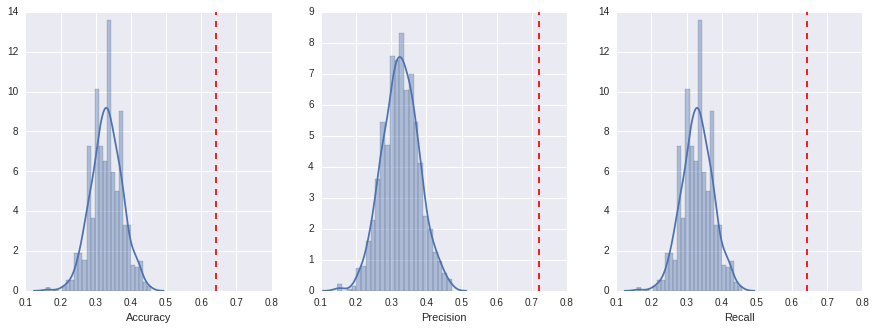

In [4]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(15, 5))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall']):
    sns.distplot(perm_scores[metric], ax=ax[i])
    ax[i].axvline(x=self_scores.mean()[metric], color='r', linestyle='--')

In [5]:
self_mean_scores = self_scores.mean()

for metric in ['Accuracy', 'Precision', 'Recall']:
    
    obs = self_mean_scores[metric]
    permuted = perm_scores[metric]
    p = (permuted > obs).sum() / len(permuted)
    print('P-value for %s (%.3f): %.3f' % (metric, obs, p))

P-value for Accuracy (0.642): 0.000
P-value for Precision (0.719): 0.000
P-value for Recall (0.642): 0.000


## Self >> Other

In [6]:
so_scores = pd.read_csv(op.join(so_dir, 'results.tsv'), sep='\t')
perms = glob(op.join(so_dir, 'perm*', 'results.tsv'))
perm_scores = pd.concat([pd.read_csv(p, sep='\t').mean() for p in perms], axis=1).T

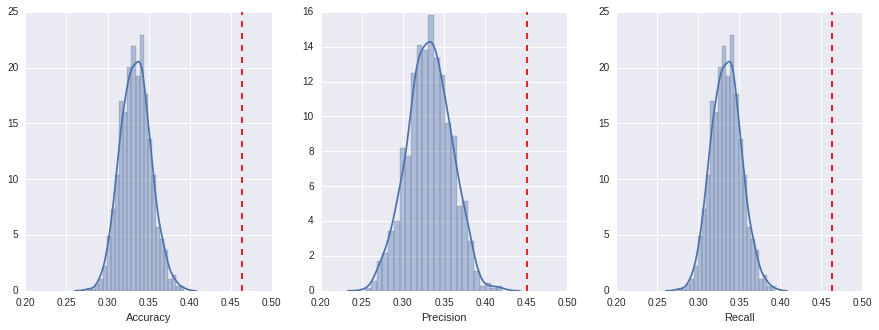

In [7]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(15, 5))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall']):
    sns.distplot(perm_scores[metric], ax=ax[i])
    ax[i].axvline(x=so_scores.mean()[metric], color='r', linestyle='--')

In [9]:
so_mean_scores = so_scores.mean()

for metric in ['Accuracy', 'Precision', 'Recall']:
    so_scores = pd.read_csv(op.join(so_dir, 'results.tsv'), sep='\t')
    obs = so_mean_scores[metric]
    permuted = perm_scores[metric]
    p = (permuted > obs).sum() / len(permuted)
    print('P-value for %s (%.3f): %.3f' % (metric, obs, p))

P-value for Accuracy (0.463): 0.000
P-value for Precision (0.451): 0.000
P-value for Recall (0.463): 0.000


## Other

In [10]:
other_scores = pd.read_csv(op.join(other_dir, 'results.tsv'), sep='\t')
perms = glob(op.join(other_dir, 'perm*', 'results.tsv'))
perm_scores = pd.concat([pd.read_csv(p, sep='\t').mean() for p in perms], axis=1).T

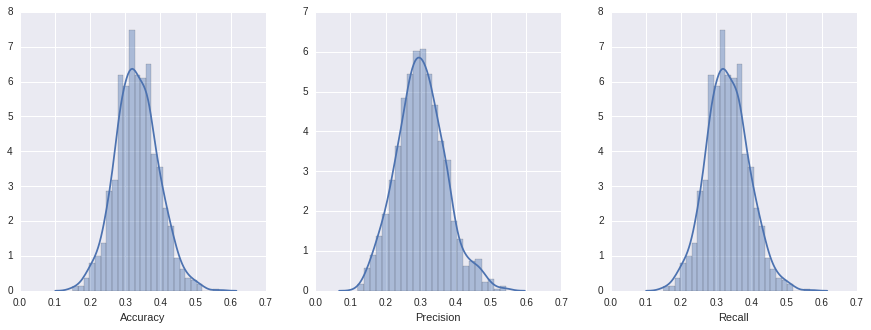

In [11]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(15, 5))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall']):
    sns.distplot(perm_scores[metric], ax=ax[i])
    ax[i].aso_scores = pd.read_csv(op.join(so_dir, 'results.tsv'), sep='\t')

In [12]:
other_mean_scores = other_scores.mean()

for metric in ['Accuracy', 'Precision', 'Recall']:
    
    obs = other_mean_scores[metric]
    permuted = perm_scores[metric]
    p = (permuted > obs).sum() / len(permuted)
    print('P-value for %s (%.3f): %.3f' % (metric, obs, p))

P-value for Accuracy (0.617): 0.000
P-value for Precision (0.613): 0.000
P-value for Recall (0.617): 0.000


## Other >> self

In [13]:
os_scores = pd.read_csv(op.join(os_dir, 'results.tsv'), sep='\t')
perms = glob(op.join(os_dir, 'perm*', 'results.tsv'))
perm_scores = pd.concat([pd.read_csv(p, sep='\t').mean() for p in perms], axis=1).T

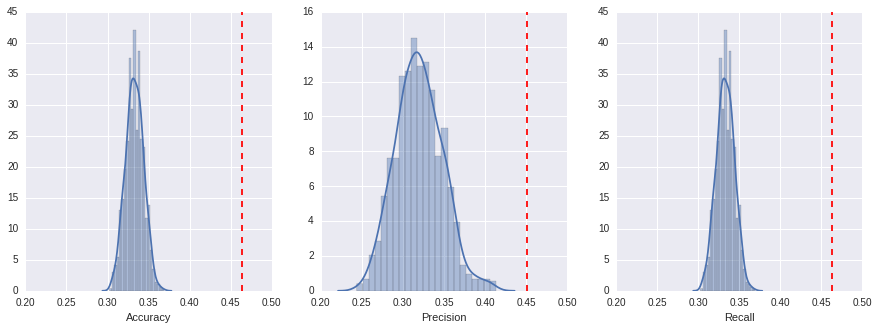

In [14]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(15, 5))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall']):
    sns.distplot(perm_scores[metric], ax=ax[i])
    ax[i].axvline(x=so_scores.mean()[metric], color='r', linestyle='--')

In [15]:
so_mean_scores = so_scores.mean()

for metric in ['Accuracy', 'Precision', 'Recall']:
    obs = so_mean_scores[metric]
    permuted = perm_scores[metric]
    p = (permuted > obs).sum() / len(permuted)
    print('P-value for %s (%.3f): %.3f' % (metric, obs, p))

P-value for Accuracy (0.463): 0.000
P-value for Precision (0.451): 0.000
P-value for Recall (0.463): 0.000
